# APOKASC3

Imports, settings, useful functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import utils
import paths

In [2]:
# Update matplotlib defaults
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (5, 3.5),
    # 'font.family': 'STIXgeneral',
    # 'mathtext.fontset': 'cm',
})

In [3]:
a3data = pd.read_csv('../data/MainTable.APOKASC3Catv1', sep='\\s+')
a3data

,KIC,Evol_State,ES_Source,Cat_Tab,Seis_Source,Spec_Source,N_Numax_Fil,N_DNu_Fil,Nquar,Numax,...,S_[N/Fe],InvR_Gaia,S_InvR_Gaia,Age_Cat,Age_RGB,S_Age_RGB+,S_Age_RGB-,Age_RC/AGB,S_Age_RC+,S_Age_RC-
0,893214,RGB,Seis,Gold,WAvg,DR17,8,5,15,40.5841,...,0.0164,0.0824,0.0029,RGB,2.9393,0.2980,-0.2639,2.9393,0.2980,-0.2639
1,1026180,RC,Spec,Gold,WAvg,DR17,8,5,4,35.6089,...,0.0107,0.0856,0.0022,RC,-9999.9000,-9999.9000,-9999.9000,3.1878,0.2754,-0.1905
2,1026309,RGB,Seis,Silver,WAvg,DR17,8,4,18,16.6974,...,0.0110,0.0479,0.0012,RGB/AGB,0.5952,0.1481,-0.1090,0.7212,0.1832,-0.1405
3,1026452,RC,Seis,Gold,WAvg,DR17,8,5,18,34.3652,...,0.0222,0.0759,0.0038,RC,-9999.9000,-9999.9000,-9999.9000,2.6999,0.2319,-0.1919
4,1027110,RGB,Seis,Silver,WAvg,DR17,8,4,18,6.5198,...,0.0131,0.0402,0.0015,RGB/AGB,9.1677,8.0551,-3.8133,6.8348,4.6171,-2.3475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,12834184,RGB,Spec,NoDet_Sh,NaN,DR17,1,0,1,-9999.0000,...,0.0140,-9999.0000,-9999.0000,NONE,-9999.9000,-9999.9000,-9999.9000,-9999.9000,-9999.9000,-9999.9000
15804,12884116,RGB,Seis,Gold,WAvg,DR17,9,6,8,50.7865,...,0.0138,0.1155,0.0027,RGB,7.7787,1.0086,-0.7863,7.7787,1.0086,-0.7863
15805,12884661,RC,Spec,Gold,WAvg,DR17,7,5,2,31.3348,...,0.0127,0.0936,0.0029,RC,-9999.9000,-9999.9000,-9999.9000,1.8055,0.1161,-0.0863
15806,12884930,RC,Seis,Gold,WAvg,DR17,9,6,10,37.8680,...,0.0219,0.0943,0.0034,RC,-9999.9000,-9999.9000,-9999.9000,3.3261,0.2900,-0.2246


Define cut between low- and high-alpha sequences

In [4]:
def alpha_cut(feh):
    """
    Function which defines the cut between the low- and high-alpha samples.

    Parameters
    ----------
    feh : array-like

    Returns
    -------
    array-like
        [Alpha/Fe] value at given [Fe/H]
    """
    # condition, if true, if false
    return np.where(feh >= 0.2, 0.05, np.where(feh >= -0.4, 0.08 - 0.15 * feh, 0.14))
    # return np.where(feh >= 0., 0.09, 0.09 - 0.13 * feh)

def alpha_pop(feh, afe):
    """
    Separates the data into low- and high-alpha samples.

    Parameters
    ----------
    feh : float or array-like
    afe : float or array-like

    Returns
    -------
    str
        'High' or 'Low'
    """
    return np.where(afe > alpha_cut(feh), 'High', 'Low')
    
a3data['Alpha_Pop'] = alpha_pop(a3data['[Fe/H]'], a3data['[Alp/Fe]'])

Select RGB & RC "Gold" stars

In [5]:
rgb_gold = a3data[(a3data['Evol_State'] == 'RGB') & (a3data['Cat_Tab'] == 'Gold') & (a3data['Age_Cat'] == 'RGB')]
rgb_gold

,KIC,Evol_State,ES_Source,Cat_Tab,Seis_Source,Spec_Source,N_Numax_Fil,N_DNu_Fil,Nquar,Numax,...,InvR_Gaia,S_InvR_Gaia,Age_Cat,Age_RGB,S_Age_RGB+,S_Age_RGB-,Age_RC/AGB,S_Age_RC+,S_Age_RC-,Alpha_Pop
0,893214,RGB,Seis,Gold,WAvg,DR17,8,5,15,40.5841,...,0.0824,0.0029,RGB,2.9393,0.2980,-0.2639,2.9393,0.2980,-0.2639,Low
5,1027337,RGB,Seis,Gold,WAvg,DR17,9,6,18,74.3689,...,0.1230,0.0033,RGB,5.9743,0.5953,-0.5247,5.9743,0.5953,-0.5247,Low
22,1164301,RGB,Seis,Gold,WAvg,DR17,8,5,15,57.6994,...,0.1268,0.0065,RGB,7.4711,1.1378,-0.9730,7.4711,1.1378,-0.9730,High
30,1294122,RGB,Seis,Gold,WAvg,DR17,9,6,18,75.5526,...,0.1295,0.0029,RGB,3.9948,0.4031,-0.3565,3.9948,0.4031,-0.3565,Low
31,1294385,RGB,Seis,Gold,WAvg,DR17,9,6,18,106.7504,...,0.1522,0.0029,RGB,3.6440,0.3401,-0.3023,3.6440,0.3401,-0.3023,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,12737278,RGB,Seis,Gold,WAvg,DR17,8,5,17,173.4092,...,0.1947,0.0041,RGB,5.0981,0.5314,-0.4504,5.0981,0.5314,-0.4504,Low
15794,12783669,RGB,Seis,Gold,WAvg,DR17,8,5,16,51.7927,...,0.1213,0.0039,RGB,8.6468,1.4601,-1.1799,8.6468,1.4601,-1.1799,High
15795,12783857,RGB,Seis,Gold,WAvg,DR17,8,5,18,78.3331,...,0.1384,0.0040,RGB,6.4252,0.8616,-0.7026,6.4252,0.8616,-0.7026,High
15804,12884116,RGB,Seis,Gold,WAvg,DR17,9,6,8,50.7865,...,0.1155,0.0027,RGB,7.7787,1.0086,-0.7863,7.7787,1.0086,-0.7863,Low


In [6]:
rc_gold = a3data[(a3data['Evol_State'] == 'RC') & (a3data['Cat_Tab'] == 'Gold') & (a3data['Age_Cat'] == 'RC')]
rc_gold

,KIC,Evol_State,ES_Source,Cat_Tab,Seis_Source,Spec_Source,N_Numax_Fil,N_DNu_Fil,Nquar,Numax,...,InvR_Gaia,S_InvR_Gaia,Age_Cat,Age_RGB,S_Age_RGB+,S_Age_RGB-,Age_RC/AGB,S_Age_RC+,S_Age_RC-,Alpha_Pop
1,1026180,RC,Spec,Gold,WAvg,DR17,8,5,4,35.6089,...,0.0856,0.0022,RC,-9999.9,-9999.9,-9999.9,3.1878,0.2754,-0.1905,Low
3,1026452,RC,Seis,Gold,WAvg,DR17,8,5,18,34.3652,...,0.0759,0.0038,RC,-9999.9,-9999.9,-9999.9,2.6999,0.2319,-0.1919,Low
8,1160684,RC,Spec,Gold,WAvg,DR17,9,6,17,26.8674,...,0.0866,0.0086,RC,-9999.9,-9999.9,-9999.9,5.2477,0.4989,-0.4825,Low
9,1160789,RC,Seis,Gold,WAvg,DR17,9,6,18,24.8831,...,0.0878,0.0018,RC,-9999.9,-9999.9,-9999.9,13.3123,1.8160,-1.4902,High
11,1161447,RC,Seis,Gold,WAvg,DR17,9,6,8,36.4550,...,0.0823,0.0030,RC,-9999.9,-9999.9,-9999.9,3.5479,0.3191,-0.2570,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,12784998,RC,Seis,Gold,WAvg,DR17,8,5,4,34.0536,...,0.0890,0.0018,RC,-9999.9,-9999.9,-9999.9,3.3823,0.3085,-0.2419,Low
15799,12785083,RC,Seis,Gold,WAvg,DR17,10,7,9,28.1868,...,0.0910,0.0023,RC,-9999.9,-9999.9,-9999.9,7.2151,0.7808,-0.8104,High
15802,12833300,RC,Seis,Gold,WAvg,DR17,8,5,4,29.7501,...,0.0926,0.0018,RC,-9999.9,-9999.9,-9999.9,7.9048,0.9279,-0.8770,High
15805,12884661,RC,Spec,Gold,WAvg,DR17,7,5,2,31.3348,...,0.0936,0.0029,RC,-9999.9,-9999.9,-9999.9,1.8055,0.1161,-0.0863,Low


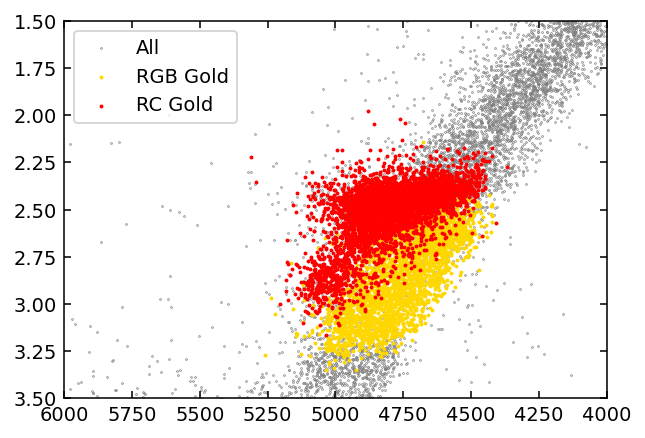

In [7]:
fig, ax = plt.subplots()
ax.scatter(a3data['Teff'], a3data['Logg_Spec'], c='grey', s=0.1, label='All')
ax.scatter(rgb_gold['Teff'], rgb_gold['Logg_Spec'], c='gold', s=1, label='RGB Gold')
ax.scatter(rc_gold['Teff'], rc_gold['Logg_Spec'], c='r', s=1, label='RC Gold')
ax.set_xlim((6000, 4000))
ax.set_ylim((3.5, 1.5))
ax.legend()
plt.show()

The RC sample behaves as expected, with the youngest stars belonging to the Secondary RC (red).

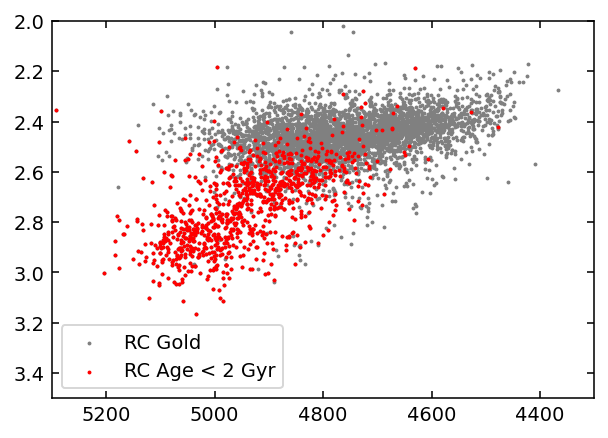

In [8]:
fig, ax = plt.subplots()
# ax.scatter(a3data['Teff'], a3data['Logg_Spec'], c='grey', s=0.1, label='All')
# ax.scatter(rgb_gold['Teff'], rgb_gold['Logg_Spec'], c='gold', s=1, label='RGB Gold')
ax.scatter(rc_gold['Teff'], rc_gold['Logg_Spec'], c='grey', s=1, label='RC Gold')
rc_young = rc_gold[rc_gold['Age_RC/AGB'] < 2]
ax.scatter(rc_young['Teff'], rc_young['Logg_Spec'], c='r', s=1, label='RC Age < 2 Gyr')
ax.set_xlim((5300, 4300))
ax.set_ylim((3.5, 2))
ax.legend()
plt.show()

In [9]:
rgb_high_alpha = rgb_gold[rgb_gold['Alpha_Pop'] == 'High']
rgb_low_alpha = rgb_gold[rgb_gold['Alpha_Pop'] == 'Low']
rc_high_alpha = rc_gold[rc_gold['Alpha_Pop'] == 'High']
rc_low_alpha = rc_gold[rc_gold['Alpha_Pop'] == 'Low']

Plot illustrating the low- and high-alpha cut for RGB stars

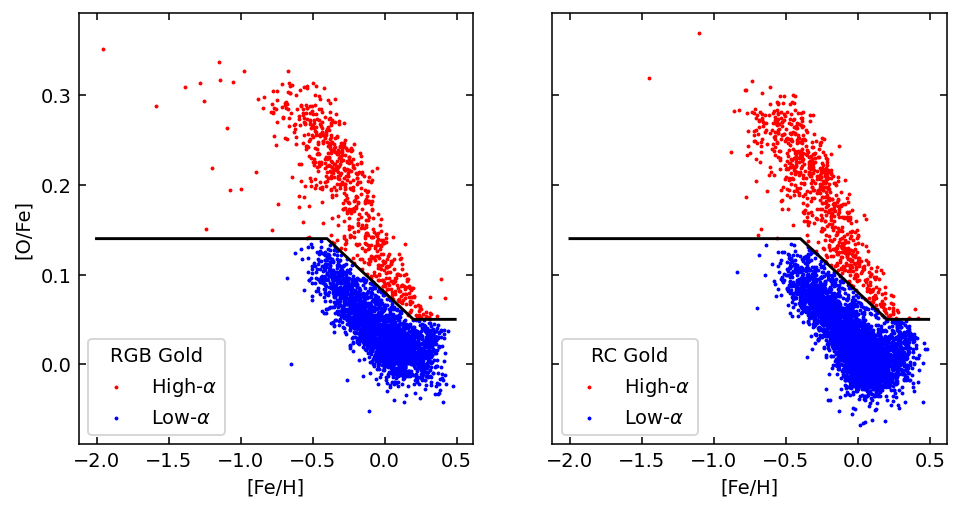

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
feh_arr = np.arange(-2., 0.5, 0.01)
axs[0].plot(feh_arr, alpha_cut(feh_arr), c='k')
axs[0].scatter(rgb_high_alpha['[Fe/H]'], rgb_high_alpha['[Alp/Fe]'], c='r', s=1, marker='o', label=r'High-$\alpha$')
axs[0].scatter(rgb_low_alpha['[Fe/H]'], rgb_low_alpha['[Alp/Fe]'], c='b', s=1, marker='o', label=r'Low-$\alpha$')

axs[1].plot(feh_arr, alpha_cut(feh_arr), c='k')
axs[1].scatter(rc_high_alpha['[Fe/H]'], rc_high_alpha['[Alp/Fe]'], c='r', s=1, marker='o', label=r'High-$\alpha$')
axs[1].scatter(rc_low_alpha['[Fe/H]'], rc_low_alpha['[Alp/Fe]'], c='b', s=1, marker='o', label=r'Low-$\alpha$')

axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
axs[0].legend(title='RGB Gold')
axs[1].legend(title='RC Gold')
plt.show()

[Fe/H] vs Age for RGB stars

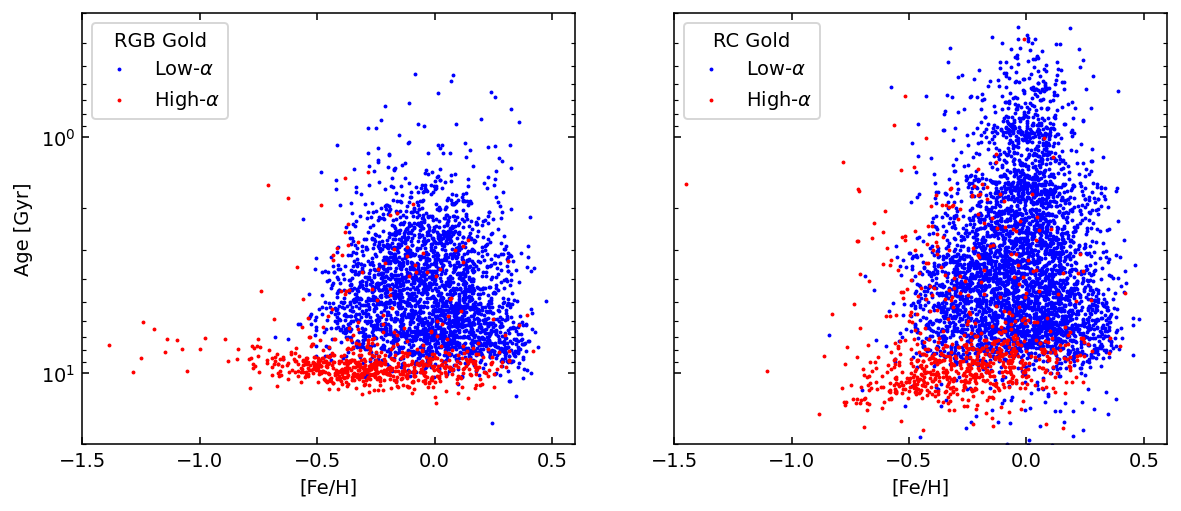

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
axs[0].scatter(rgb_low_alpha['[Fe/H]'], rgb_low_alpha['Age_RGB'], s=1, c='b', label=r'Low-$\alpha$')
axs[0].scatter(rgb_high_alpha['[Fe/H]'], rgb_high_alpha['Age_RGB'], s=1, c='r', label=r'High-$\alpha$')
axs[0].legend(title='RGB Gold')

axs[1].scatter(rc_low_alpha['[Fe/H]'], rc_low_alpha['Age_RC/AGB'], s=1, c='b', label=r'Low-$\alpha$')
axs[1].scatter(rc_high_alpha['[Fe/H]'], rc_high_alpha['Age_RC/AGB'], s=1, c='r', label=r'High-$\alpha$')
axs[1].legend(title='RC Gold')

axs[0].set_xlim((-1.5, 0.6))
axs[0].set_ylim((20, 0.3))
axs[0].set_yscale('log')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('Age [Gyr]')
plt.show()

Median age uncertainties in 1-Gyr age bins

In [12]:
rgb_age_errors = rgb_gold.groupby(pd.cut(rgb_gold['Age_RGB'], np.arange(0, 15, 2)), observed=True)[['S_Age_RGB-', 'S_Age_RGB+']].median()
rgb_age_errors

,S_Age_RGB-,S_Age_RGB+
Age_RGB,,
"(0, 2]",-0.10440,0.12750
"(2, 4]",-0.25310,0.29715
"(4, 6]",-0.46320,0.54950
"(6, 8]",-0.72960,0.87840
"(8, 10]",-1.07370,1.27115
"(10, 12]",-1.32050,1.57020
"(12, 14]",-1.61405,1.88945


In [13]:
rc_age_errors = rc_gold.groupby(pd.cut(rc_gold['Age_RC/AGB'], np.arange(0, 15, 2)), observed=True)[['S_Age_RC-', 'S_Age_RC+']].median()
rc_age_errors

,S_Age_RC-,S_Age_RC+
Age_RC/AGB,,
"(0, 2]",-0.07500,0.10065
"(2, 4]",-0.20330,0.24810
"(4, 6]",-0.40700,0.49515
"(6, 8]",-0.64415,0.81860
"(8, 10]",-0.90220,1.11885
"(10, 12]",-1.17025,1.40230
"(12, 14]",-1.42640,1.74940


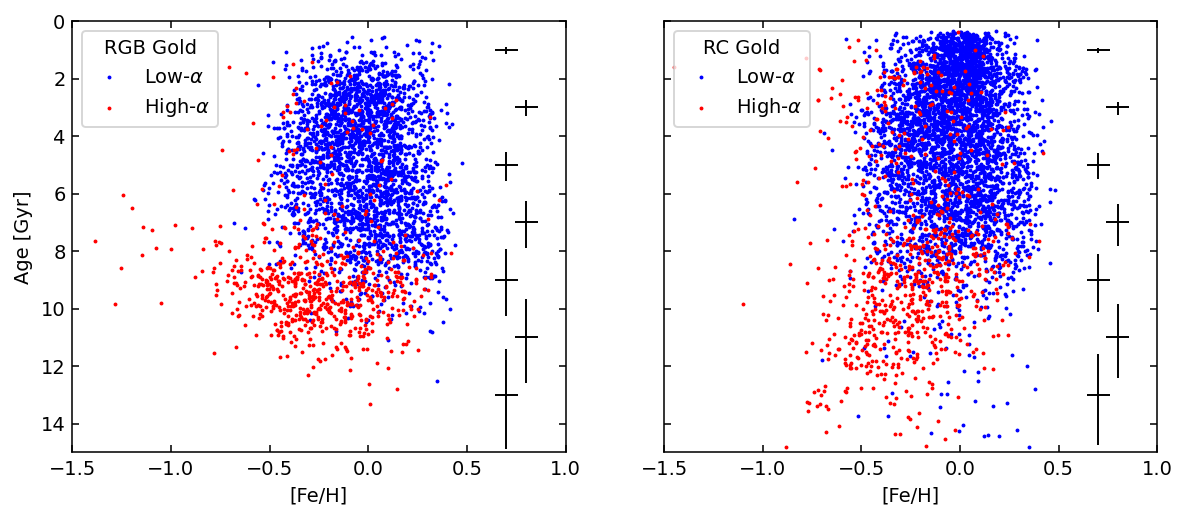

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
axs[0].scatter(rgb_low_alpha['[Fe/H]'], rgb_low_alpha['Age_RGB'], s=1, c='b', label=r'Low-$\alpha$')
axs[0].scatter(rgb_high_alpha['[Fe/H]'], rgb_high_alpha['Age_RGB'], s=1, c='r', label=r'High-$\alpha$')
axs[0].legend(title='RGB Gold')
# Plot median age uncertainties
axs[0].errorbar([0.7, 0.8, 0.7, 0.8, 0.7, 0.8, 0.7], np.arange(1, 15, 2),
                xerr=rgb_gold['S_[Fe/H]'].median(),
                yerr=rgb_age_errors.abs().to_numpy().T,
                fmt='none', elinewidth=1, ecolor='k')

axs[1].scatter(rc_low_alpha['[Fe/H]'], rc_low_alpha['Age_RC/AGB'], s=1, c='b', label=r'Low-$\alpha$')
axs[1].scatter(rc_high_alpha['[Fe/H]'], rc_high_alpha['Age_RC/AGB'], s=1, c='r', label=r'High-$\alpha$')
axs[1].legend(title='RC Gold')
# Plot median age uncertainties
axs[1].errorbar([0.7, 0.8, 0.7, 0.8, 0.7, 0.8, 0.7], np.arange(1, 15, 2),
                xerr=rc_gold['S_[Fe/H]'].median(),
                yerr=rc_age_errors.abs().to_numpy().T,
                fmt='none', elinewidth=1, ecolor='k')

axs[0].set_xlim((-1.5, 1.))
axs[0].set_ylim((15, 0))
# axs[0].set_yscale('log')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('Age [Gyr]')
plt.show()

Plot MDFs in bins of age

In [15]:
np.histogram(rgb_low_alpha['Age_RGB'], bins=np.arange(0, 11, 1))

(array([ 18, 147, 359, 426, 391, 392, 346, 277, 155,  48]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [16]:
np.histogram(rc_low_alpha['Age_RC/AGB'], bins=np.arange(0, 11, 1))

(array([315, 614, 560, 600, 517, 456, 434, 272, 150,  46]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

Age_RGB
(1, 2]    Axes(0.125,0.11;0.775x0.77)
(2, 3]    Axes(0.125,0.11;0.775x0.77)
(3, 4]    Axes(0.125,0.11;0.775x0.77)
(4, 5]    Axes(0.125,0.11;0.775x0.77)
(5, 6]    Axes(0.125,0.11;0.775x0.77)
(6, 7]    Axes(0.125,0.11;0.775x0.77)
(7, 8]    Axes(0.125,0.11;0.775x0.77)
(8, 9]    Axes(0.125,0.11;0.775x0.77)
Name: [Fe/H], dtype: object

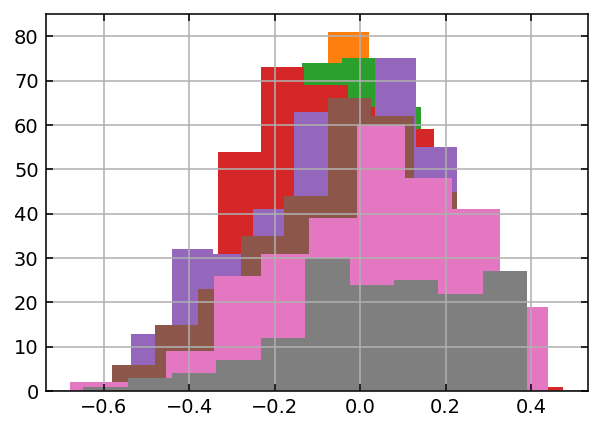

In [17]:
age_bin = pd.cut(rgb_low_alpha['Age_RGB'], np.arange(1, 10, 1))
feh_bin = pd.cut(rgb_low_alpha['[Fe/H]'], np.arange(-0.8, 0.6, 0.1))
# rgb_low_alpha.hist('[Fe/H]', by=age_cut)
rgb_low_alpha.groupby(age_bin, observed=True)['[Fe/H]'].hist()

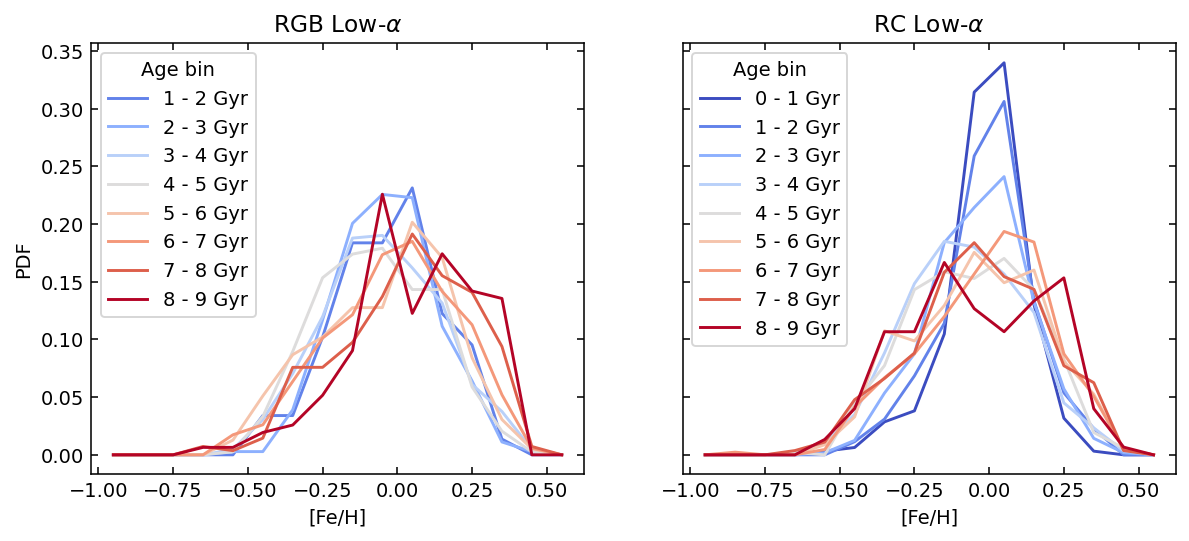

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# Calculate 2d histogram in age and [Fe/H]
hist2d, xedges, yedges = np.histogram2d(rgb_low_alpha['Age_RGB'], rgb_low_alpha['[Fe/H]'], bins=[np.arange(0, 10, 1), np.arange(-1, 0.61, 0.1)])
# For each bin in age, plot normalized MDF
colors = utils.get_color_list(plt.get_cmap('coolwarm'), xedges)
for i, h in enumerate(hist2d):
    # Skip 0-1 Gyr age bin because it has few RGB stars
    if i == 0:
        continue
    axs[0].plot(utils.get_bin_centers(yedges), h / h.sum(), label='%s - %s Gyr' % tuple(xedges[i:i+2]), c=colors[i])
axs[0].set_title(r'RGB Low-$\alpha$')
axs[0].legend(title='Age bin')

# Same but for RC stars
hist2d, xedges, yedges = np.histogram2d(rc_low_alpha['Age_RC/AGB'], rc_low_alpha['[Fe/H]'], bins=[np.arange(0, 10, 1), np.arange(-1, 0.61, 0.1)])
# For each bin in age, plot normalized MDF
colors = utils.get_color_list(plt.get_cmap('coolwarm'), xedges)
for i, h in enumerate(hist2d):
    axs[1].plot(utils.get_bin_centers(yedges), h / h.sum(), label='%s - %s Gyr' % tuple(xedges[i:i+2]), c=colors[i])
axs[1].set_title(r'RC Low-$\alpha$')
axs[1].legend(title='Age bin')

axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('PDF')
plt.show()

The RC MDFs behave as I expected: narrowest for the youngest stars and broadest for the oldest, with the mode/median not changing much over time. On the other hand, the RGB MDFs get slightly but not substantially broader with age, but they do shift to higher [Fe/H], which is interesting and not what I expected.

- What do age errors look like for RGB / RC?
- Add Silver sample
- Compare High-alpha age spread

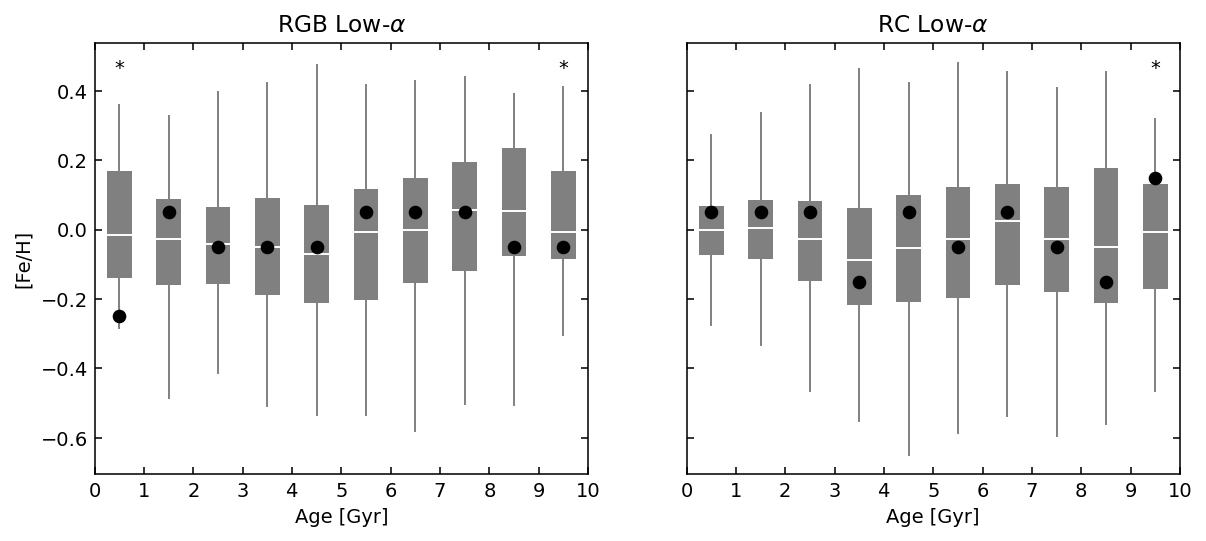

In [19]:
# To do: box-and-whisker plots plus modes for MDFs in each age bin.
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
age_bins = np.arange(0, 11, 1)
age_bin_centers = utils.get_bin_centers(age_bins)
feh_bin_width = 0.1
feh_bins = np.arange(-1, 0.61, feh_bin_width)
feh_bin_centers = utils.get_bin_centers(feh_bins)

def plot_amr(df, ax, age_col='Age_RGB'):
    feh_arr = []
    modes = []
    for i in range(len(age_bins) - 1):
        subset = df[(df[age_col] > age_bins[i]) & (df[age_col] < age_bins[i+1])]
        feh_arr.append(subset['[Fe/H]'])
        # mode
        mdf, bin_edges = np.histogram(subset['[Fe/H]'], bins=feh_bins)
        modes.append(feh_bin_centers[np.argmax(mdf)])
        # indicate bins with few stars
        if subset.shape[0] < 50:
            ax.text(age_bin_centers[i], 0.45, '*', ha='center')
    # box plot
    bplot = ax.boxplot(feh_arr, positions=age_bin_centers, showfliers=False, patch_artist=True,
                       medianprops={'color': 'white'}, whiskerprops={'color': 'gray'},
                       showcaps=False, zorder=0)
    for patch in bplot['boxes']:
        patch.set_facecolor('gray')
        patch.set_edgecolor('none')
    # modes
    ax.plot(age_bin_centers, modes, 'ko', label='Mode')

axs[0].set_title(r'RGB Low-$\alpha$')
plot_amr(rgb_low_alpha, axs[0], age_col='Age_RGB')
axs[1].set_title(r'RC Low-$\alpha$')
plot_amr(rc_low_alpha, axs[1], age_col='Age_RC/AGB')

axs[0].set_xlim((0, 10))
axs[0].set_xticks(range(11))
axs[0].set_xticklabels(range(11))
axs[0].set_xlabel('Age [Gyr]')
axs[1].set_xlabel('Age [Gyr]')
axs[0].set_ylabel('[Fe/H]')

plt.show()

A * indicates fewer than 50 stars in a given bin. Medians seem fairly consistent across all age bins. Modes also seem consistent given the bin width and the noisiness of the mode as a statistic. I'd need to do some bootstrapping to estimate an error on the mode. The interquartile range for the RGB stars does seem to trend upwards for older ages, while for the RC stars the range increases but stays centered at roughly solar [Fe/H] with increasing age.

## Estimating migration distance from age & metallicity

Assuming a constant metallicity gradient of $\nabla{\rm [Fe/H]}=-0.07$ dex/kpc (Myers et al. 2022).

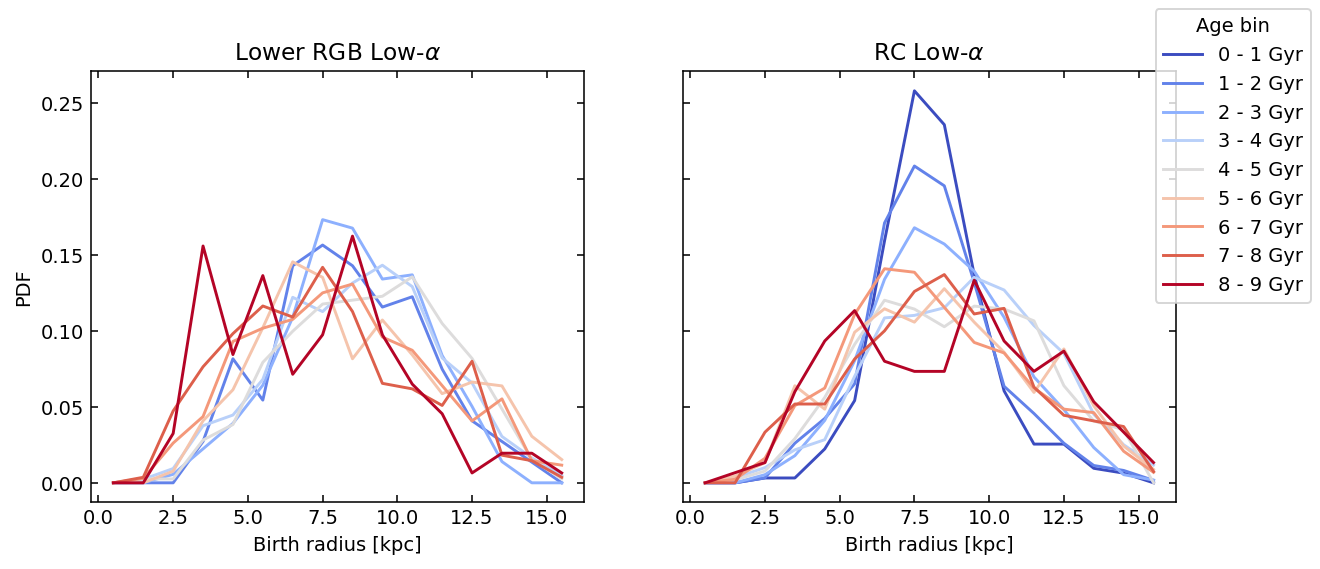

In [20]:
def get_birth_radius(feh, grad_feh=-0.07, zero_point=8):
    """
    Calculates the birth radius of the given star(s) based on [Fe/H].
    Assumes the metallicity gradient from Myers et al. (2022).

    Parameters
    ----------
    feh : array-like
        Array of stellar [Fe/H] measurements.
    grad_feh : float, optional
        [Fe/H] gradient in dex/kpc. The default is -0.07 (Myers et al. 2022).
    zero_point : float, optional
        Present-day radius of Solar metallicity (i.e., [Fe/H] = 0) in kpc.
        The default is 8.
    """
    return feh / grad_feh + zero_point

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# RGB stars
hist2d, xedges, yedges = np.histogram2d(rgb_low_alpha['Age_RC/AGB'], get_birth_radius(rgb_low_alpha['[Fe/H]']), 
                                        bins=[np.arange(0, 10, 1), np.arange(0, 17, 1)])
# For each bin in age, plot normalized distribution of birth radii
colors = utils.get_color_list(plt.get_cmap('coolwarm'), xedges)
for i, h in enumerate(hist2d):
    # Skip 0-1 Gyr age bin because it has few RGB stars
    if i == 0:
        continue
    axs[0].plot(utils.get_bin_centers(yedges), h / h.sum(), c=colors[i])
axs[0].set_title(r'Lower RGB Low-$\alpha$')

# RC stars
hist2d, xedges, yedges = np.histogram2d(rc_low_alpha['Age_RC/AGB'], get_birth_radius(rc_low_alpha['[Fe/H]']), 
                                        bins=[np.arange(0, 10, 1), np.arange(0, 17, 1)])
# For each bin in age, plot normalized distribution of birth radii
colors = utils.get_color_list(plt.get_cmap('coolwarm'), xedges)
for i, h in enumerate(hist2d):
    axs[1].plot(utils.get_bin_centers(yedges), h / h.sum(), label='%s - %s Gyr' % tuple(xedges[i:i+2]), c=colors[i])
axs[1].set_title(r'RC Low-$\alpha$')

fig.legend(title='Age bin')
axs[0].set_xlabel('Birth radius [kpc]')
axs[1].set_xlabel('Birth radius [kpc]')
axs[0].set_ylabel('PDF')

plt.show()

## Comparison with Feuillet et al. (2018)

In [21]:
# Import Feuillet et al. (2018) data
f18_age_mh = pd.read_csv(paths.data / 'feuillet2018' / 'age_mh.dat', sep='\\s+', 
                         names=['[M/H]_Low', '[M/H]_High', 'Log_Age_Median', 'Log_Age_Dispersion'])
f18_age_mh['Age_Median'] = 1e-9 * 10**f18_age_mh['Log_Age_Median']
f18_age_mh['Age_Dispersion_High'] = 1e-9 * 10**(f18_age_mh['Log_Age_Median'] + f18_age_mh['Log_Age_Dispersion']) - f18_age_mh['Age_Median']
f18_age_mh['Age_Dispersion_Low'] = 1e-9 * 10**(f18_age_mh['Log_Age_Median'] - f18_age_mh['Log_Age_Dispersion']) - f18_age_mh['Age_Median']
f18_age_mh

,[M/H]_Low,[M/H]_High,Log_Age_Median,Log_Age_Dispersion,Age_Median,Age_Dispersion_High,Age_Dispersion_Low
0,-0.965,-0.534,10.05,0.05,11.220185,1.369070,-1.220185
1,-0.516,-0.393,9.90,0.21,7.943282,4.939213,-3.045494
2,-0.365,-0.302,9.55,0.05,3.548134,0.432938,-0.385856
3,-0.301,-0.263,9.55,0.05,3.548134,0.432938,-0.385856
4,-0.257,-0.223,9.60,0.05,3.981072,0.485764,-0.432938
5,-0.223,-0.194,9.50,0.17,3.162278,1.515074,-1.024316
6,-0.190,-0.160,9.70,0.31,5.011872,5.221058,-2.557163
7,-0.157,-0.126,9.60,0.37,3.981072,5.351471,-2.282828
8,-0.125,-0.094,9.40,0.25,2.511886,1.954949,-1.099349
9,-0.092,-0.063,9.40,0.31,2.511886,2.616727,-1.281618


Count number of RC stars in each [Fe/H] bin

In [22]:
feh_bins = np.arange(-1, 0.61, 0.2).round(1)
rc_grouped = rc_gold.groupby(pd.cut(rc_gold['[Fe/H]'], feh_bins), observed=True)
rgb_grouped = rgb_gold.groupby(pd.cut(rgb_gold['[Fe/H]'], feh_bins), observed=True)
counts = pd.concat([rgb_grouped['Age_RGB'].count(), rc_grouped['Age_RC/AGB'].count()], axis=1)
counts.columns = ['RGB', 'RC']
counts

,RGB,RC
[Fe/H],,
"(-1.0, -0.8]",6,4
"(-0.8, -0.6]",48,59
"(-0.6, -0.4]",219,308
"(-0.4, -0.2]",656,903
"(-0.2, -0.0]",1008,1604
"(-0.0, 0.2]",936,1508
"(0.2, 0.4]",373,420
"(0.4, 0.6]",12,13


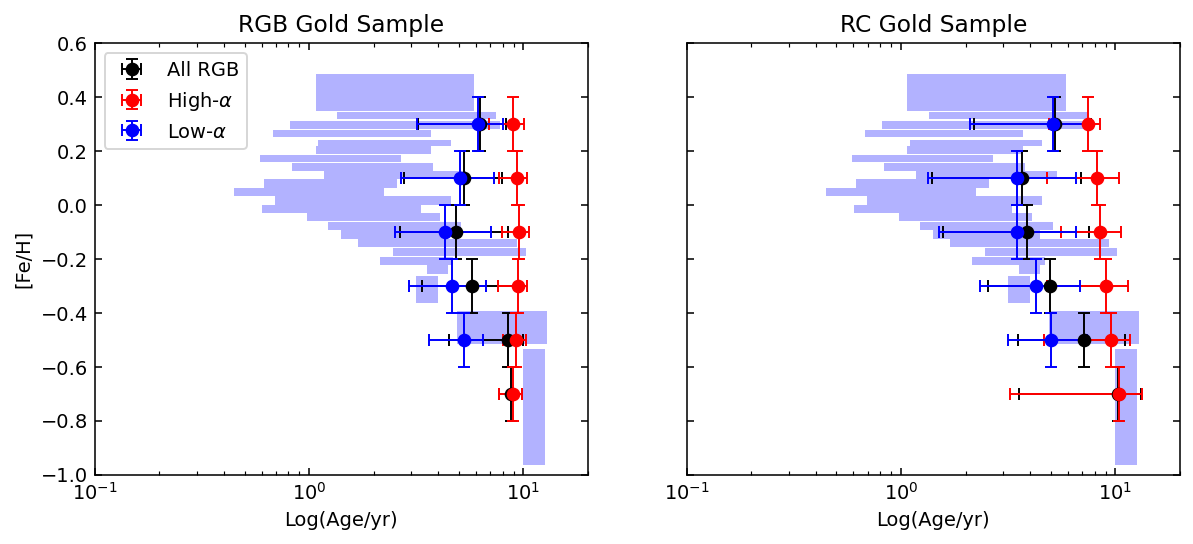

In [23]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='none', alpha=0.5):
    """
    Add a rectangle patch defined by error bar limits.
    """
    # Error array cleaning
    xerror = np.abs(xerror)
    yerror = np.abs(yerror)
    # If errors are symmetric, convert to 2xN shape
    if len(xerror.shape) == 1:
        xerror = np.array([xerror, xerror])
    if len(yerror.shape) == 1:
        yerror = np.array([yerror, yerror])
    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]
    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)
    # Add collection to Axes
    ax.add_collection(pc)
    return pc

def plot_age_dispersion(ax, df, feh_bins, age_col='Age_RGB', color='k', min_stars=15, **kwargs):
    # Group data into [Fe/H] bins
    grouped = df.groupby(pd.cut(df['[Fe/H]'], feh_bins), observed=False)
    # Calculate median, 16th and 84th percentiles
    age_med = grouped[age_col].median()
    age_disp_low = grouped[age_col].median() - grouped[age_col].quantile(0.16)
    age_disp_high = grouped[age_col].quantile(0.84) - grouped[age_col].median()
    counts = grouped[age_col].count()
    artist = ax.errorbar(age_med[counts > min_stars], 
                         utils.get_bin_centers(feh_bins)[counts > min_stars], 
                         xerr=[age_disp_low.abs()[counts > min_stars], age_disp_high[counts > min_stars]],
                         yerr=0.5*(feh_bins[1:]-feh_bins[:-1])[counts > min_stars], 
                         elinewidth=1, ecolor=color, capsize=3,
                         linestyle='none', marker='o', color=color, **kwargs)
    return artist
    

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# Shaded regions indicate age dispersion from Feuillet et al. (2018)
make_error_boxes(axs[0], f18_age_mh['Age_Median'].to_numpy(), (0.5*(f18_age_mh['[M/H]_Low'] + f18_age_mh['[M/H]_High'])).to_numpy(),
                 f18_age_mh[['Age_Dispersion_Low', 'Age_Dispersion_High']].to_numpy().T, (0.5*(f18_age_mh['[M/H]_High'] - f18_age_mh['[M/H]_Low'])).to_numpy(),
                 facecolor='b', alpha=0.3)
make_error_boxes(axs[1], f18_age_mh['Age_Median'].to_numpy(), (0.5*(f18_age_mh['[M/H]_Low'] + f18_age_mh['[M/H]_High'])).to_numpy(),
                 f18_age_mh[['Age_Dispersion_Low', 'Age_Dispersion_High']].to_numpy().T, (0.5*(f18_age_mh['[M/H]_High'] - f18_age_mh['[M/H]_Low'])).to_numpy(),
                 facecolor='b', alpha=0.3)

# Plot APOKASC3 age dispersion for RGB stars in bins of [Fe/H]
feh_bins = np.arange(-1., 0.61, 0.2)
plot_age_dispersion(axs[0], rgb_gold, feh_bins, age_col='Age_RGB', label='All RGB')
# Plot high- and low-alpha age dispersion
plot_age_dispersion(axs[0], rgb_high_alpha, feh_bins, age_col='Age_RGB', label=r'High-$\alpha$', color='r')
plot_age_dispersion(axs[0], rgb_low_alpha, feh_bins, age_col='Age_RGB', label=r'Low-$\alpha$', color='b')
axs[0].set_title('RGB Gold Sample')
axs[0].legend()

# Same for RC stars
plot_age_dispersion(axs[1], rc_gold, feh_bins, age_col='Age_RC/AGB', label='All RC')
# Plot high- and low-alpha age dispersion
plot_age_dispersion(axs[1], rc_high_alpha, feh_bins, age_col='Age_RC/AGB', label=r'High-$\alpha$', color='r')
plot_age_dispersion(axs[1], rc_low_alpha, feh_bins, age_col='Age_RC/AGB', label=r'Low-$\alpha$', color='b')
axs[1].set_title('RC Gold Sample')

axs[0].set_xlim((0.1, 20))
axs[0].set_xscale('log')
axs[0].set_ylim((-1, 0.6))
axs[0].set_xlabel('Log(Age/yr)')
axs[1].set_xlabel('Log(Age/yr)')
axs[0].set_ylabel('[Fe/H]')
plt.show()

Median age and age dispersion of the APOKASC3 stars in bins of [Fe/H]. Bins with fewer than 15 stars in any sub-sample are not shown. The blue boxes represent the AMR of Feuillet et al. (2018) for the solar neighborhood.

## Age Distributions

In [74]:
class Gaussian:
    """
    A generic normalized Gaussian function of time.

    Attributes
    ----------
    center : float
        The location of the peak of the Gaussian function.
    stdev : float
        The standard deviation of the Gaussian function.
    norm : float
        The normalization of the Gaussian function.

    """
    def __init__(self, center=1, stdev=1, coeff=1, normalize=True):
        """
        Initialize the Gaussian.

        Parameters
        ----------
        center : float [default: 1]
            The location of the peak of the Gaussian function.
        stdev : float [default: 1]
            The standard deviation of the Gaussian function.
        coeff : float [default: 1]
            The post-normalization coefficient.

        """
        self.center = center
        self.stdev = stdev
        self.coeff = coeff
        if normalize:
            self.norm = 1 / (stdev * np.sqrt(2 * np.pi))
        else:
            self.norm = 1

    def __call__(self, time):
        C = self.coeff * self.norm
        return C * np.exp(-(time-self.center)**2 / (2*self.stdev**2))

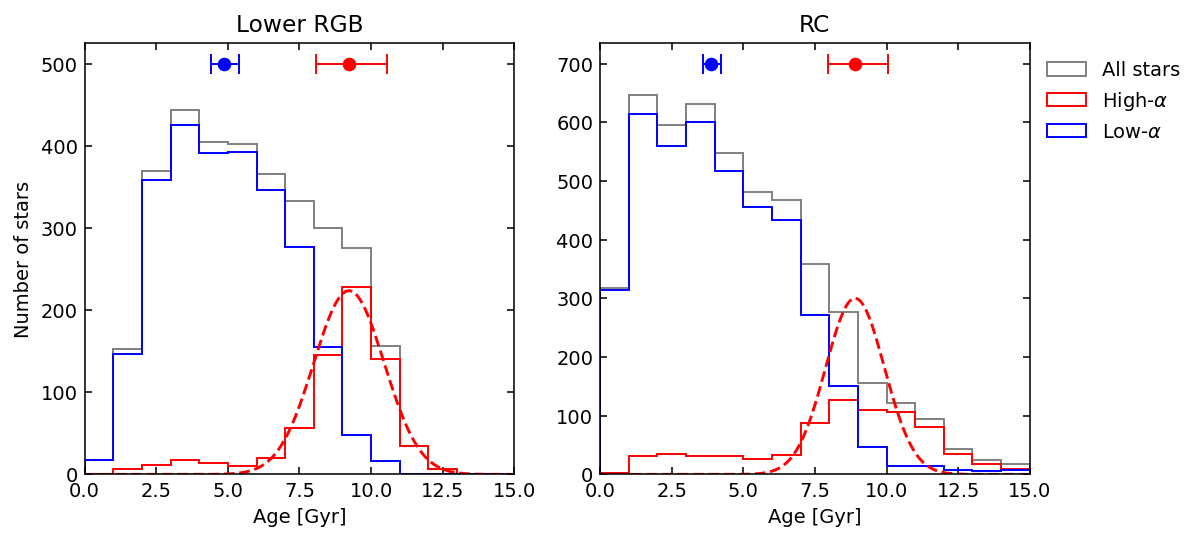

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
fig.subplots_adjust(right=0.8)

# Lower RGB
age_bins = np.arange(0, 16, 1)
age_bin_centers = utils.get_bin_centers(age_bins)
axs[0].set_title('Lower RGB')
axs[0].hist(rgb_gold['Age_RGB'], bins=age_bins, histtype='step', color='grey', label='All stars')
axs[0].hist(rgb_high_alpha['Age_RGB'], bins=age_bins, histtype='step', color='r', label=r'High-$\alpha$')
axs[0].hist(rgb_low_alpha['Age_RGB'], bins=age_bins, histtype='step', color='b', label=r'Low-$\alpha$')
# Plot median age uncertainties
axs[0].errorbar(rgb_high_alpha['Age_RGB'].median(), 500,
                xerr=np.array([rgb_high_alpha[['S_Age_RGB-', 'S_Age_RGB+']].abs().median()]).T,
                fmt='o', elinewidth=1, color='r', capsize=5)
axs[0].errorbar(rgb_low_alpha['Age_RGB'].median(), 500,
                xerr=np.array([rgb_low_alpha[['S_Age_RGB-', 'S_Age_RGB+']].abs().median()]).T,
                fmt='o', elinewidth=1, color='b', capsize=5)
# Gaussian representing median uncertainty
rgb_gauss = Gaussian(center=rgb_high_alpha['Age_RGB'].median(),
                 stdev=rgb_high_alpha[['S_Age_RGB-', 'S_Age_RGB+']].abs().median(axis=None),
                 coeff=rgb_high_alpha.shape[0])
ages = np.arange(0, 15.1, 0.1)
axs[0].plot(ages, rgb_gauss(ages), 'r--')
axs[0].set_xlim((0, 15))
axs[0].set_ylim((0, None))
axs[0].set_xlabel('Age [Gyr]')
axs[0].set_ylabel('Number of stars')

# RC
axs[1].set_title('RC')
axs[1].hist(rc_gold['Age_RC/AGB'], bins=age_bins, histtype='step', color='grey', label='All stars')
axs[1].hist(rc_high_alpha['Age_RC/AGB'], bins=age_bins, histtype='step', color='r', label=r'High-$\alpha$')
axs[1].hist(rc_low_alpha['Age_RC/AGB'], bins=age_bins, histtype='step', color='b', label=r'Low-$\alpha$')
# Plot median age uncertainties
axs[1].errorbar(rc_high_alpha['Age_RC/AGB'].median(), 700,
                xerr=np.array([rc_high_alpha[['S_Age_RC-', 'S_Age_RC+']].abs().median()]).T,
                fmt='o', elinewidth=1, color='r', capsize=5)
axs[1].errorbar(rc_low_alpha['Age_RC/AGB'].median(), 700,
                xerr=np.array([rc_low_alpha[['S_Age_RC-', 'S_Age_RC+']].abs().median()]).T,
                fmt='o', elinewidth=1, color='b', capsize=5)
# Gaussian representing median uncertainty
rc_gauss = Gaussian(center=rc_high_alpha['Age_RC/AGB'].median(),
                 stdev=rc_high_alpha[['S_Age_RC-', 'S_Age_RC+']].abs().median(axis=None),
                 coeff=rc_high_alpha.shape[0])
ages = np.arange(0, 15.1, 0.1)
axs[1].plot(ages, rc_gauss(ages), 'r--')
axs[1].set_xlabel('Age [Gyr]')

axs[1].legend(frameon=False, bbox_to_anchor=(1., 1.))

plt.show()